Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1.Load the dataset into python environment.

In [2]:
df=pd.read_csv('titanic_dataset (1).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  2. Make 'PassengerId' as index column.

In [3]:
df=df.set_index('PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3.Check basic details of the dataset

In [4]:
#Checking the number of rows and columns(dimensions)
df.shape

(891, 11)

891 rows and 11 columns

In [5]:
#Checking the column names
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Checking the summary of statistics pertaining to the columns
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Checking the information(concise summary of DataFrame)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
#Checking datatypes of each column
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
#Checking null values in each columns
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age,Cabin and Enbarked columns have missing values in the dataset.

# 4.Fill in all missing values present in all the columns in the dataset

In [10]:
#Checking the percentage of  null values in each columns
df.isnull().sum()/df.shape[0]*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

 From this we can see that the percentage of missing values in Cabin column is over 77% and it is not providing much information to the data.So we can drop Cabin column.

# Cabin column nulls:

In [11]:
print('Number of null values in Cabin column: ', df['Cabin'].isnull().sum())

Number of null values in Cabin column:  687


Dropping the cabin column:

In [12]:
df.drop(['Cabin'],axis = 1,inplace=True)

# Age column nulls:

In [13]:
print('Number of null values in age column: ', df['Age'].isnull().sum())

Number of null values in age column:  177


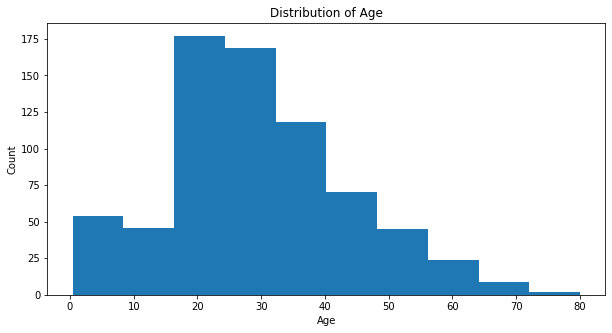

In [14]:
#Histogram to find the distribution to decide how to fill the missing values
fig=plt.subplots(figsize=(10,5))
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

 Age column can be filled with  median as the distribution is right skewed(not a normal distribution)

In [15]:
print('Number of null values in age column: ', df['Age'].isnull().sum())

Number of null values in age column:  177


In [16]:
df['Age']=df['Age'].fillna(df['Age'].median())

df.isnull().sum()
print('Number of null values in age column: ', df['Age'].isnull().sum())

Number of null values in age column:  0


# Embarked column nulls:

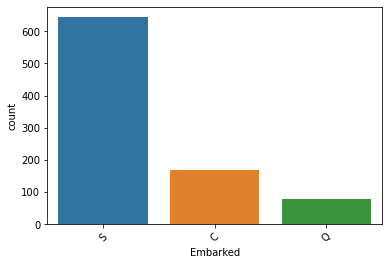

In [17]:
#Visual distribution using countplot.
sns.countplot(x='Embarked',data=df)
plt.xticks(rotation = 45)
plt.show()

In [18]:
print('Number of null values in Embarked column: ', df['Embarked'].isnull().sum())

Number of null values in Embarked column:  2


Filling in Embarked column with mode as it is a categorical feature.

In [19]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
print('Number of null values in Embarked column: ', df['Embarked'].isnull().sum())

Number of null values in Embarked column:  0


Checking for any null values after filling all:

In [20]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Nomore missing values as all are now filled.

# 5.Check and handle outliers in atleast 3 columns in the dataset

Using boxplot visualization to find outliers in Age,SibSp,Fare and Pclass columns

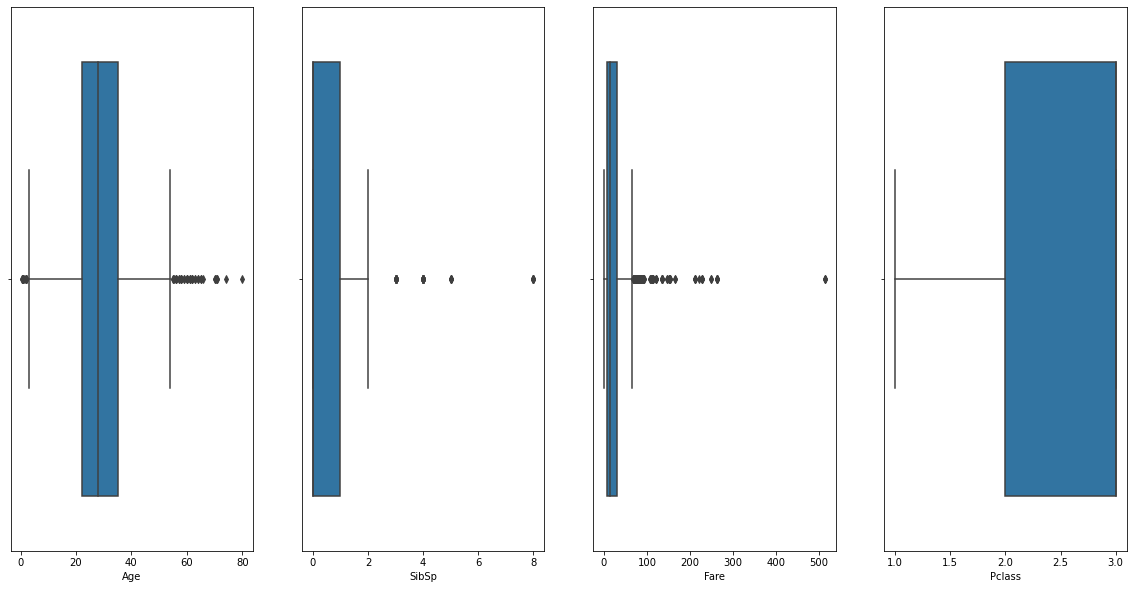

In [21]:
fig=plt.subplots(figsize=(20,10))
plt.subplot(1,4,1)
sns.boxplot(df['Age'],data=df)
plt.subplot(1,4,2)
sns.boxplot(df['SibSp'],data=df)
plt.subplot(1,4,3)
sns.boxplot(df['Fare'],data=df)
plt.subplot(1,4,4)
sns.boxplot(df['Pclass'])

plt.show()

Using IQR method to handle all the outliers in Age,SibSp and Fare columns.No Outliers in Pclass to handle.

# Handling outliers in Age column:

In [22]:
#using IQR method to identify those outliers

Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [23]:
df['Age'].median()

28.0

In [24]:
IQR= Q3 - Q1
low_lim = Q1 - 1.5* IQR
up_lim = Q3 + 1.5 * IQR
print("IQR is : ",IQR)
print("Lower Limit is :",low_lim)
print("Upper limit is: ",up_lim)

IQR is :  13.0
Lower Limit is : 2.5
Upper limit is:  54.5


In [25]:
#Finding those outlier values

outlier_age = []
for i in df['Age']:
    if((i>up_lim) or (i<low_lim)):
        outlier_age.append(i)

In [26]:
#Outlier values in Age
outlier_age

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [27]:
len(outlier_age)

66

There are 66 outlier values

In [28]:
#Finding those outlier indexes in upper limit
ind1=df['Age']>up_lim
df.loc[ind1].index 

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [29]:
#Finding those outlier indexes in lower limit
ind2=df['Age']<low_lim
df.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

Dropping those outlier indexes in Age

In [30]:
df=df.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880,8, 17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832])

{'whiskers': [<matplotlib.lines.Line2D at 0x27f85e3a640>,
 'caps': [<matplotlib.lines.Line2D at 0x27f85e3abe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27f85e3a370>],
 'medians': [<matplotlib.lines.Line2D at 0x27f85e4a1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27f85e4a490>],
 'means': []}

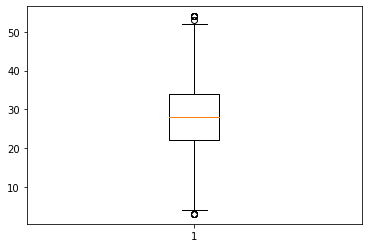

In [31]:
#Boxplot after dropping 
plt.boxplot(df['Age'])

In [32]:
df.shape

(825, 10)

We have dropped 66 rows as outliers in Age column which were extreme outliers

# Handling outliers in SibSp:

In [33]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [34]:
IQR_sibsp=Q3-Q1
IQR_sibsp

1.0

In [35]:
lower_sibsp=Q1-1.5*IQR_sibsp
print(lower_sibsp)
upper_sibsp=Q3+1.5*IQR_sibsp
print(upper_sibsp)


-1.5
2.5


In [36]:
#Finding outlier values in SibSp

outliers_sibsp=[]
for i in df['SibSp']:
    if(i>upper_sibsp)or(i<lower_sibsp):
        outliers_sibsp.append(i)

In [37]:
len(outliers_sibsp)

39

There are 39 outlier values in SibSp Column

In [38]:
#Finding the indexes of those outliers

In [39]:
#Upper outlier indexes
ind1=df['SibSp']>upper_sibsp
df.loc[ind1].index 

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [40]:
#Lower outlier indexes
ind2=df['SibSp']<lower_sibsp
df.loc[ind2].index

Int64Index([], dtype='int64', name='PassengerId')

No values  below lower fence of whisker

Dropping outliers in SibSp

In [41]:
df=df.drop([25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864])

{'whiskers': [<matplotlib.lines.Line2D at 0x27f85ea6610>,
 'caps': [<matplotlib.lines.Line2D at 0x27f85ea6bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27f85ea6340>],
 'medians': [<matplotlib.lines.Line2D at 0x27f85eb4190>],
 'fliers': [<matplotlib.lines.Line2D at 0x27f85eb4460>],
 'means': []}

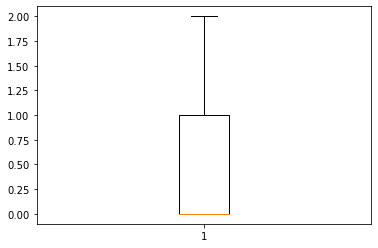

In [42]:
#Boxplotting to see the image after outlier handling
plt.boxplot(df['SibSp'])

In [43]:
df.shape

(786, 10)

We have removed 39 indexes which were outliers in SibSp

# Handling outliers in Fare

In [44]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.8958
13.0
27.75


In [45]:
IQR_fare=Q3-Q1
IQR_fare

19.8542

In [46]:
lower_fare=Q1-1.5*IQR_fare
print(lower_fare)
upper_fare=Q3+1.5*IQR_fare
print(upper_fare)

-21.885499999999997
57.5313


In [47]:
#Finding outlier values in Fare

outliers_fare=[]
for i in df['Fare']:
    if(i>upper_fare)or(i<lower_fare):
        outliers_fare.append(i)

In [48]:
len(outliers_fare)

102

There are 102 outlier values in Fare

In [49]:
#Finding the indexes of those outliers
ind1=df['Fare']>upper_fare
out_fare=df.loc[ind1].index 
out_fare


Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=102)

Dropping those Outliers indexes in Fare column

In [50]:
df=df.drop(out_fare)

In [51]:
df.shape

(684, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x27f85f14c10>,
 'caps': [<matplotlib.lines.Line2D at 0x27f85f231f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27f85f14940>],
 'medians': [<matplotlib.lines.Line2D at 0x27f85f23790>],
 'fliers': [<matplotlib.lines.Line2D at 0x27f85f23a60>],
 'means': []}

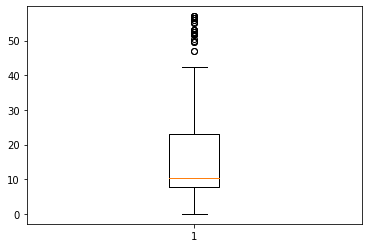

In [52]:
#Boxplotting to see the image after outlier handling
plt.boxplot(df['Fare'])

We have dropped 102 outlier indexes from Fare 

# 6.Do minmax scaling on the feature set(Take 'Survived' as target)

We can scale only numerical features that are  not encoded categorical features.

In [53]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [54]:
#Checking unique values
df['Name'].nunique()


684

In [55]:
df['Ticket'].nunique()

592

Dropping both Name and Ticket from dataset as it has all unique values and not so important to the data.If all the values in a column are unique then it will not be contributing anything to ML. We can only use it as an identifier or label.So we can drop the those columns.

In [56]:
df = df.drop(['Ticket', 'Name'], axis=1)

In [57]:
#We just need numerical features for scaling
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

# MinMax Scaling

We need to do MinMax scaling in numerical features which dont need encoding

In [58]:
#import necessary libraries for min max scaler

from sklearn.preprocessing import MinMaxScaler

#create an instance

scaler=MinMaxScaler()

Taking only features- Pclass,Age,SibSp,Parch and Fare to scale.

In [59]:
num_cols=['Pclass', 'Age', 'SibSp', 'Parch','Fare']

In [60]:
#performing min max scaler fitting and transforming
df[num_cols]=scaler.fit_transform(df[num_cols])


In [61]:
df[num_cols].describe()

,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.752193,0.502207,0.135965,0.044591,0.286268
std,0.357408,0.185072,0.250491,0.125948,0.221255
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.000000,0.000000,0.137793
50%,1.000000,0.490196,0.000000,0.000000,0.184211
75%,1.000000,0.588235,0.000000,0.000000,0.404605
max,1.000000,1.000000,1.000000,1.000000,1.000000


Now all the original numerical important independent features are scaled to a minimum value of 0 and maximum value of 1 with other values between 0 and 1.

In [62]:
#We can encode Sex and Embarked column as those where categorical features

In [63]:
df=pd.get_dummies(df)

In [64]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,1.0,0.372549,0.5,0.000000,0.127193,0,1,0,0,1
3,1,1.0,0.450980,0.0,0.000000,0.139035,1,0,0,0,1
4,1,0.0,0.627451,0.5,0.000000,0.931579,1,0,0,0,1
5,0,1.0,0.627451,0.0,0.000000,0.141228,0,1,0,0,1
6,0,1.0,0.490196,0.0,0.000000,0.148391,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,0.5,0.470588,0.0,0.000000,0.228070,0,1,0,0,1
888,1,0.0,0.313725,0.0,0.000000,0.526316,1,0,0,0,1
889,0,1.0,0.490196,0.5,0.333333,0.411404,1,0,0,0,1


In [65]:
#We can split data into X with independent features and y with target variable.
X = df.drop('Survived', axis=1) 
y = df['Survived'] 

In [66]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,1.0,0.372549,0.5,0.000000,0.127193,0,1,0,0,1
3,1.0,0.450980,0.0,0.000000,0.139035,1,0,0,0,1
4,0.0,0.627451,0.5,0.000000,0.931579,1,0,0,0,1
5,1.0,0.627451,0.0,0.000000,0.141228,0,1,0,0,1
6,1.0,0.490196,0.0,0.000000,0.148391,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
887,0.5,0.470588,0.0,0.000000,0.228070,0,1,0,0,1
888,0.0,0.313725,0.0,0.000000,0.526316,1,0,0,0,1
889,1.0,0.490196,0.5,0.333333,0.411404,1,0,0,0,1


In [67]:
y

PassengerId
1      0
3      1
4      1
5      0
6      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 684, dtype: int64